<a href="https://colab.research.google.com/github/zychen1017/Approaching-Almost-Any-Machine-Learning-Problem/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The most commom metrics used for Classification problems:
    - Accuracy
    - Precision(P)
    - Recall(R)
    - F1 score(F1)
    - Area under the ROC (Receiver Operating Characteristic) curve or simply AUC(AUC)
    ---
    (multi-label classification.)
    - Log loss
    - Precision at k (P@k)
    - Average precision at k (AP@k)
    - Mean average precision at k (MAP@k)

2. The most commom metrics used for Regreesion problems:
    - Mean absolute error (MAE)
    - Mean squared error (MSE)
    - Root mean squared error (RMSE)
    - Root mean squared logarithmic error (RMSLE)
    - Mean percentage error (MPE)
    - Mean absolute percentage error (MAPE)
    - R2




---



---



- **Calculation**:

    True positive (TP), True negative (TN), False positive (FP), False negative (FN)

    **Accuracy Score** = (TP + TN) / (TP + TN + FP + FN)

    measures the accuracy of a model when predicting the positive class, means the ratio of correctly predicted positive samples to all predictive positive samples

    **Precision** = TP / (TP + FP)

    assesses the model's ability to capture positive class samples, indicating the ratio of correctly predicted positive samples to all actual positive samples

    **F1 Score** = 2TP / (2TP + FP + FN)

    F1 score also ranges from 0 to 1,
    and a perfect prediction model has an F1 of 1. When dealing with datasets that have
    skewed targets, we should look at F1 (or precision and recall) instead of accuracy.

    **Classification_report:** is a comprehensive report containing performance metrics of a classification model.

In [58]:
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
accuracy_score = metrics.accuracy_score(l1,l2)
accuracy_score


0.625

**Generally, accuracy is an intuitive metic, but in the case of imbalanced
classes, it may be influenced by the sample distribution.**

In [59]:
precision_score = metrics.precision_score(l1,l2)
precision_score

0.6666666666666666

In [60]:
recall_score = metrics.recall_score(l1,l2)
recall_score

0.5

**For a “good” model, our precision and recall values should be high.**

In [61]:
f1_score = metrics.f1_score(l1,l2)
f1_score

0.5714285714285715

In [62]:
f1_score = metrics.f1_score(l1,l2,average='weighted') # average = none(default), macro(each class have an equal contribution), micro(imbalanced datasets), weighted(imbalanced datasets)
f1_score

0.6190476190476191

This curve is known as the **Receiver Operating Characteristic (ROC)**. And
if we calculate the area under this ROC curve, we are calculating another metric **Area Under Curve(AUC)**
which is used very often when you have a dataset which has **skewed binary targets**.

**TPR or True Positive Rate**: TPR = TP / (TP + FN), TPR or recall is also known as **sensitivity**.

**FPR or False Positive Rate**: FPR = FP / (TN + FP), is known as **specificity**


In [63]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# y_pred = model.predict(x_test)                     # prediction
# y_score = model.predict_proba(x_test)[:,1]         # predict probiability, usually [:,1] to extract the proba associated with the positive class.
y_pred = [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
y_scores = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

report = metrics.classification_report(y_true,y_pred)
print(report)
roc_auc = metrics.roc_auc_score(y_true, y_scores)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.78      0.80      0.78        15
weighted avg       0.81      0.80      0.80        15

0.8300000000000001


**roc_auc Explaination:**

Suppose you get an AUC of 0.83 when you build a model. This means that if you select a random data from your
positive sample and another random data from negative sample, then this data is positive will rank higher
than a data is negative with a probability of 0.83.

In [64]:
# log_loss metrics for multiple label classification
# The sensitivity of log loss to probability makes it may not be the most appropriate choice in some cases,
# especially if the categories are unbalanced or there are outliers.

logloss = metrics.log_loss(y_true, y_scores)
print(logloss)

0.49882711861432294


              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



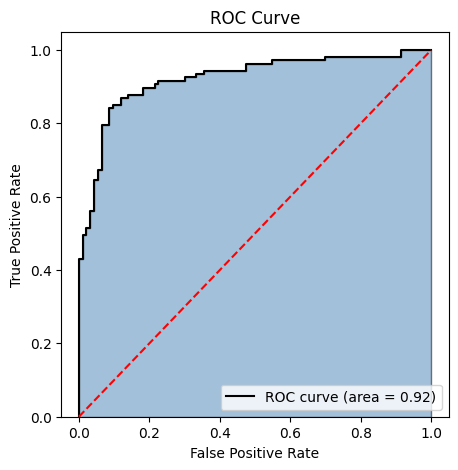

In [65]:
# A  Complete Example
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve, roc_auc_score, log_loss, classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# training dataset
X, y  = datasets.make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# predicting proba
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:,1]
###### Binary classification, two columns represent the proba of the sample belonging to the negative and the positive respectively.
###### In this scenario, [:,1] to extract the proba associated with the positive class.

# print report
report = classification_report(y_test, y_pred)
print(report)

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)

# getting ROC curve point
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# paint curve
plt.figure(figsize=(5,5))
plt.stackplot(fpr, tpr, color='steelblue', alpha =0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', label = f'ROC curve (area = {roc_auc:0.2f})') # 1. use label to show the roc_auc
plt.plot([0,1],[0,1], linestyle='--',color='red')
# plt.text(0.3,0.2,f'ROC curve (area = {roc_auc:0.2f})') # 2. add text into plt
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Confusion matrix**:

A confusion matrix is nothing
but a table of TP, FP, TN and FN. Using the confusion matrix, you can quickly see
how many samples were misclassified and how many were classified correctly.



[[8 2]
 [1 4]]


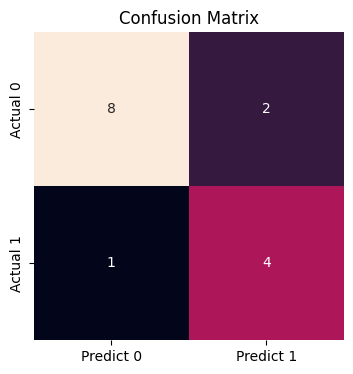

In [74]:
import seaborn as sns
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# y_pred = model.predict(x_test)
y_pred = [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

cm = metrics.confusion_matrix(y_true, y_pred)
print(cm)

# print cm using sns
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cbar=False, xticklabels=['Predict 0','Predict 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix')
plt.show()



---



---



---



---



---



**mean squared error (MSE)**

In [79]:
# This is how we calculation MSE in python
def mean_squared_error(y_true, y_pred):
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
    # calculate squared error
    # and add to error
        error += (yt - yp) ** 2
    # return mean error
        return error / len(y_true)

MAE: 8.0203
MSE: 109.3875
RMSE: 10.4588
R-squared: 0.9855


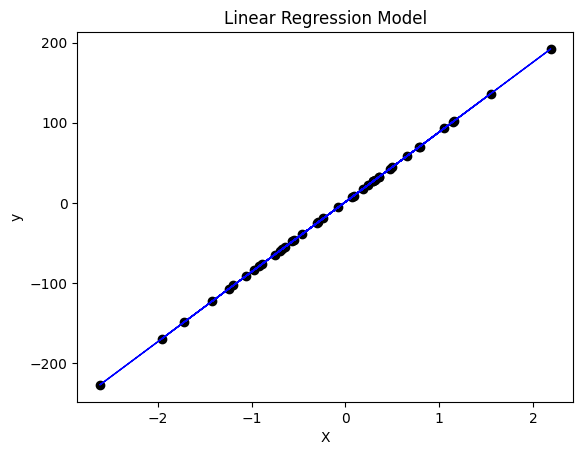

In [101]:
# A complete example for regression

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create some data
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# train data with linearregression
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# print these value
print(f'MAE: {mae:0.4f}')
print(f'MSE: {mse:0.4f}')
print(f'RMSE: {rmse:0.4f}')
print(F'R-squared: {r_squared:0.4f}')

# paint this dataset and linear function (Simple linear regression can paint)
plt.scatter(X_test, y_pred, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()